# **Download Data Set here :** https://www.kaggle.com/vetrirah/ml-iot/

## Link to the Analytics Vidhya HACKATHON - JanataHack Machine Learning for IOT

### Problem Statement :
### https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-iot/#ProblemStatement

### Leaderboard - Rank 14
### Reached Rank 8 Later 
### https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-iot/#LeaderBoard

## Steps for Applied Machine Learning (ML) for Hackathons :

1.  Understand the Problem Statement & Import Packages and Datasets.  

2.  Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

       *       Explore Train and Test Data and get to know what each Column / Feature denotes.
       *       Check for Imbalance of Target Column in Datasets.
       *       Visualize Count Plots & Unique Values to infer from Datasets.
            
3.  Remove Duplicate Rows from Train Data if present.

4.  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill.

5.  Feature Engineering 

      *       Feature Selection - Selection of Most Important Existing Features.
      *       Feature Creation  - Creation  of New Feature from the Existing Features.
      
6.  Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent).      
7.  Data Encoding - Label Encoding, OneHot Encoding and Data Scaling - MinMaxScaler, StandardScaler, RobustScaler
8.  Create Baseline ML Model for Multi Class Classification Problem
9.  Improve ML Model,Fine Tune with MODEL Evaluation METRIC - RMSE and Predict Traget "Outcome"
10. Result Submission, Check Leaderboard & Improve "RMSE"

## 1.  Understand the Problem Statement & Import Packages and Datasets :

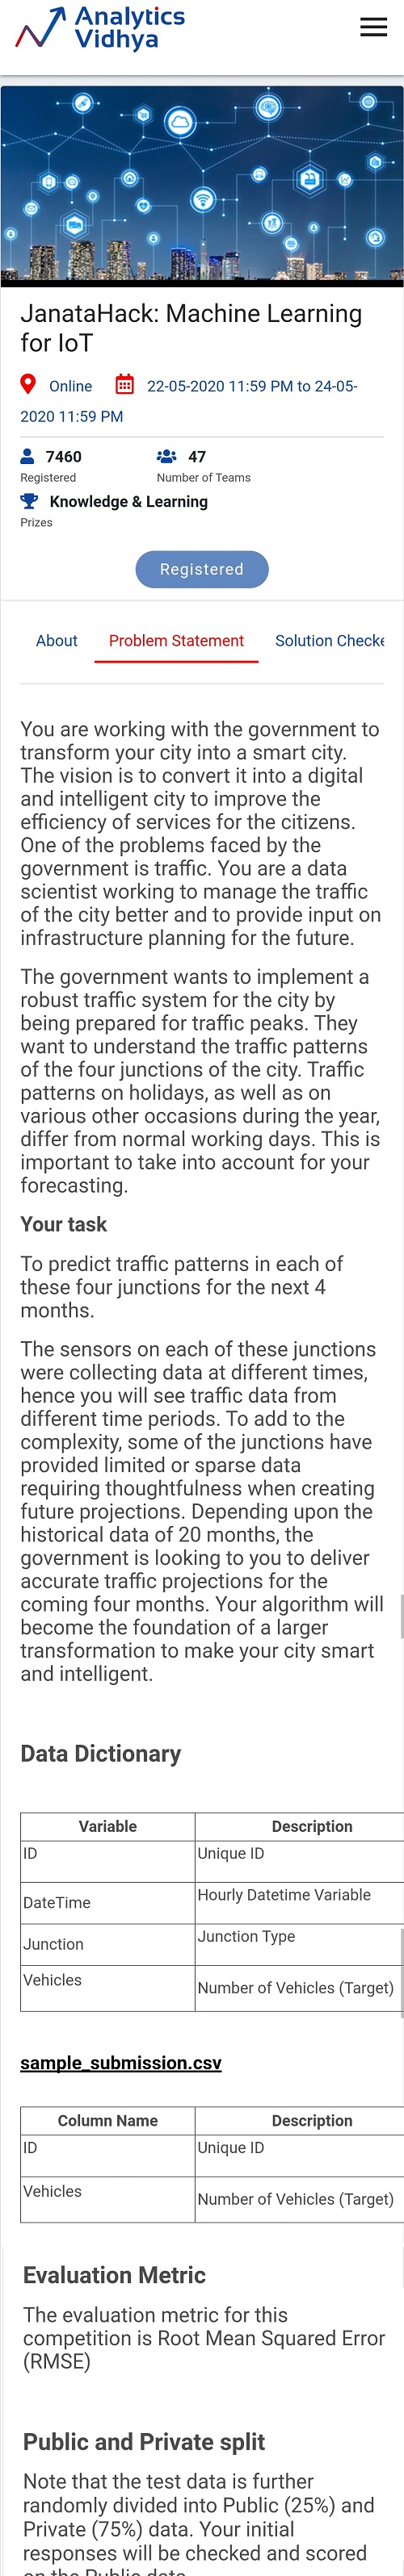

In [ ]:
# Import Required Python Packages :

# Scientific and Data Manipulation Libraries :

import numpy as np
import pandas as pd

# Data Viz & Regular Expression Libraries :

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# Scikit-Learn ML Libraries :

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

# Garbage Collection Libraries :

import gc

# Boosting Algorithm Libraries :

from sklearn.tree                     import DecisionTreeClassifier
from xgboost                          import XGBRegressor
from catboost                         import CatBoostRegressor
from lightgbm                         import LGBMRegressor
from sklearn.ensemble                 import ExtraTreesClassifier, VotingClassifier

# Date & Time Libraries :
from datetime import datetime
import time

# Setting SEED in Numpy to get Reproducible Results :
np.random.seed(0)

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Data - Train, Test and Sample Submission can be Downloaded by Registering by Clicking the Link :

### https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-iot/#ProblemStatement

In [ ]:
# Loading data from the default Path "/kaggle/input/" + Created data Repository "health" :
# Import Data from Excel Files in .csv format and store in Table format called DataFrame using Pandas :

train           = pd.read_csv('../input/ml-iot/train_ML_IOT.csv')
test            = pd.read_csv('../input/ml-iot/test_ML_IOT.csv')
ss              = pd.read_csv('../input/ml-iot/sample_submission_ML_IOT.csv')

## 2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :    

### 2.1 Explore Train and Test Data and get to know what each Column / Feature denotes :

In [ ]:
# Python Method 1 : Displays Data Information :

def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        

# Display Data Information of "train" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(train, data_types, "Train")

In [ ]:
# Display Data Information of "test" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(test, data_types, "Test")

In [ ]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "Train", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(train, head_rows=3, tail_rows=2)

In [ ]:
# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "Test", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(test, head_rows=3, tail_rows=2)

In [ ]:
# Python Method 3 : Displays Data Description using Statistics :

def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
#     print("")
    display(data.describe( include = categorical_data_types))

# Display Data Description of "Train" :

display_data_description(train, data_types[0:4], data_types[4:7])

In [ ]:
# Display Data Description of "Test" :

display_data_description(test, data_types[0:4], data_types[4:7])

In [ ]:
# Checking Percentage(%) of Common ID's  between train and test data using Unique train values :

np.intersect1d(train['ID'], test['ID']).shape[0]/train['ID'].nunique()

# No Common ID - So Data Leak in ID Column - Good to Go !!!

In [ ]:
# Dropping "ID" Columns in Train and Test :

train.drop(["ID"],axis = 1,inplace=True)

test_ID = test["ID"]
test.drop(["ID"],axis = 1,inplace=True)

## 3.  Remove Duplicate Rows from Train data if present :

In [ ]:
# Python Method 4 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

# Remove Duplicates from "train" data :

train = remove_duplicate(train)

# No Duplicates are there to remove - Good to Go !!!

## 4.  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill :

In [ ]:
# Python Method 5 : Fills or Imputes Missing values with Various Methods : 

def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display((data.isnull().sum()).sum())
    
    if (data.isnull().sum()).sum() != 0 :
    
        for column in columns :

            # Fill Missing Values with Specific Value :
            if "Value_Fill" in fill_types :
                data[ column ] = data[ column ].fillna(fill_value)
    #             print("Value_Fill")

            # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
            if "Forward_Fill" in fill_types :
                data[ column ] = data[ column ].ffill(axis = 0)
    #             print("Forward_Fill")

            # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
            if "Backward_Fill" in fill_types :
                data[ column ] = data[ column ].bfill(axis = 0)
    #             print("Backward_Fill")

        print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
        display(data.isnull().sum())
    
    return data

fill_types = [ "Forward_Fill"]
fill_value = 0

# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" : 
train = fill_missing_values(train, fill_value, fill_types, train.columns,"train")

# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" :
test  = fill_missing_values(test, fill_value, fill_types,train.columns,"test")

In [ ]:
# Python Method 6 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")
        
# Displays Unique Values in Each Column of "Train" :

display_unique(train)

# Display this info in a Table Format - Improvements coming In Part 2

In [ ]:
display_unique(test)

## 5.  Feature Engineering

### 5.1 Feature Selection - Selection of Most Important Existing Features
### 5.2 Feature Creation  - Creation  of New Features from the Existing Features / Predictors :

In [ ]:
# Python Method 7 : Converts Date to seconds & Replacing Date with unixtime list :

def datetounix(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [ ]:
# Converting to datetime :

# filtering data greater than or equal to 01 Jan 2016
# train=train[train['DateTime']>='2016-01-01']

train['DateTime'] = pd.to_datetime(train['DateTime'])
test['DateTime'] = pd.to_datetime(test['DateTime'])
test.info()

In [ ]:
# Creating features from DateTime for train data

train['Weekday'] = [datetime.weekday(date) for date in train.DateTime]
train['Year'] = [date.year for date in train.DateTime]
train['Month'] = [date.month for date in train.DateTime]
train['Day'] = [date.day for date in train.DateTime]
train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in train.DateTime]
train['Week'] = [date.week for date in train.DateTime]
train['Quarter'] = [date.quarter for date in train.DateTime]

# Creating features from DateTime for test data

test['Weekday'] = [datetime.weekday(date) for date in test.DateTime]
test['Year'] = [date.year for date in test.DateTime]
test['Month'] = [date.month for date in test.DateTime]
test['Day'] = [date.day for date in test.DateTime]
test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in test.DateTime]
test['Week'] = [date.week for date in test.DateTime]
test['Quarter'] = [date.quarter for date in test.DateTime]

In [ ]:
# Visualising the histogram for positive reviews only from train and dataset
data = train.Vehicles
binwidth = 1
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Traffic")
plt.ylabel("Number of times")
plt.show()

## 6.  Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent) and 

## 7. Data Encoding - OneHot Encoding :

In [ ]:
# Convert timestamp to seconds
train_features = datetounix(train.drop(['Vehicles','Year', 'Quarter', 'Month'], axis=1))
test_features = datetounix(test.drop(['Year', 'Quarter', 'Month'], axis=1))

# Store Features / Predictors in array :
X      = train_features  
X_test = test_features

# Convert into String / Catergorial Features :
X[ 'Junction' ]                         = X[ 'Junction' ].astype('str')
X[ 'Weekday' ]                          = X[ 'Weekday' ].astype('str')
X[ 'Day' ]                              = X[ 'Day' ].astype('str')
X_test[ 'Junction' ]                    = X_test[ 'Junction' ].astype('str')
X_test[ 'Weekday' ]                     = X_test[ 'Weekday' ].astype('str')
X_test[ 'Day' ]                         = X_test[ 'Day' ].astype('str')

# One Hot Encoding - Using Dummies :
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

# Store target 'Vehicles' in y array :
y = train['Vehicles'].to_frame()

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "X", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :
print("X.shape : ", X.shape)
display_head_tail(X, head_rows=3, tail_rows=2)
display(X.columns)

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "X_test", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

print("X_test.shape : ", X_test.shape)
display_head_tail(X_test, head_rows=3, tail_rows=2)
display(X_test.columns)

## 8.  Create Baseline ML Model :

In [ ]:
# Data prep
df_solution = pd.DataFrame()
df_solution['ID'] = test_ID

# Starting time for time calculations
start_time = time.time()

value = 16

# Algorithm 0 : Baseline - Decision tree Classifier  
# Refer Official Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# -------------------------------------------------------------------------------------------------------------------------

# 1. Create a Baseline - Machine Learning Model :

clf = LGBMRegressor(boosting_type='gbdt',
                    max_depth=6,
                    learning_rate=0.25, 
                    n_estimators=80, # BESTTTT !!! Reduced 
                    min_split_gain=0.7,
                    reg_alpha=0.00001,
                    random_state = value
                   )



# 2. Fit the created Machine Learning Model on "train" data - X(Predictors) & y(Target) :
clf = clf.fit(X, y)

# 3. Predict the Target "Vehicles" for testing data - X_test(Predictors)  :
predictions = clf.predict(X_test)

print("The time taken to execute is %s seconds" % (time.time() - start_time))

## 9. Improve ML Model,Fine Tune with MODEL Evaluation METRIC - RMSE and Predict Target "Vehicles" :

In [ ]:
# To be Done - Later !

## 10. Result Submission, Check Leaderboard & Improve RMSE :

In [ ]:
submission_count = 0

In [ ]:
# Prepare Solution dataframe
df_solution['Vehicles'] = predictions
display(df_solution.head())

classifier_name = "LGBM_Regressor_TUNED_BEST_SUBMITTED"+str(value)

submission_count = submission_count + 1
df_solution.to_csv(str(submission_count)+".)_FINAL "+classifier_name+".csv", index = False)

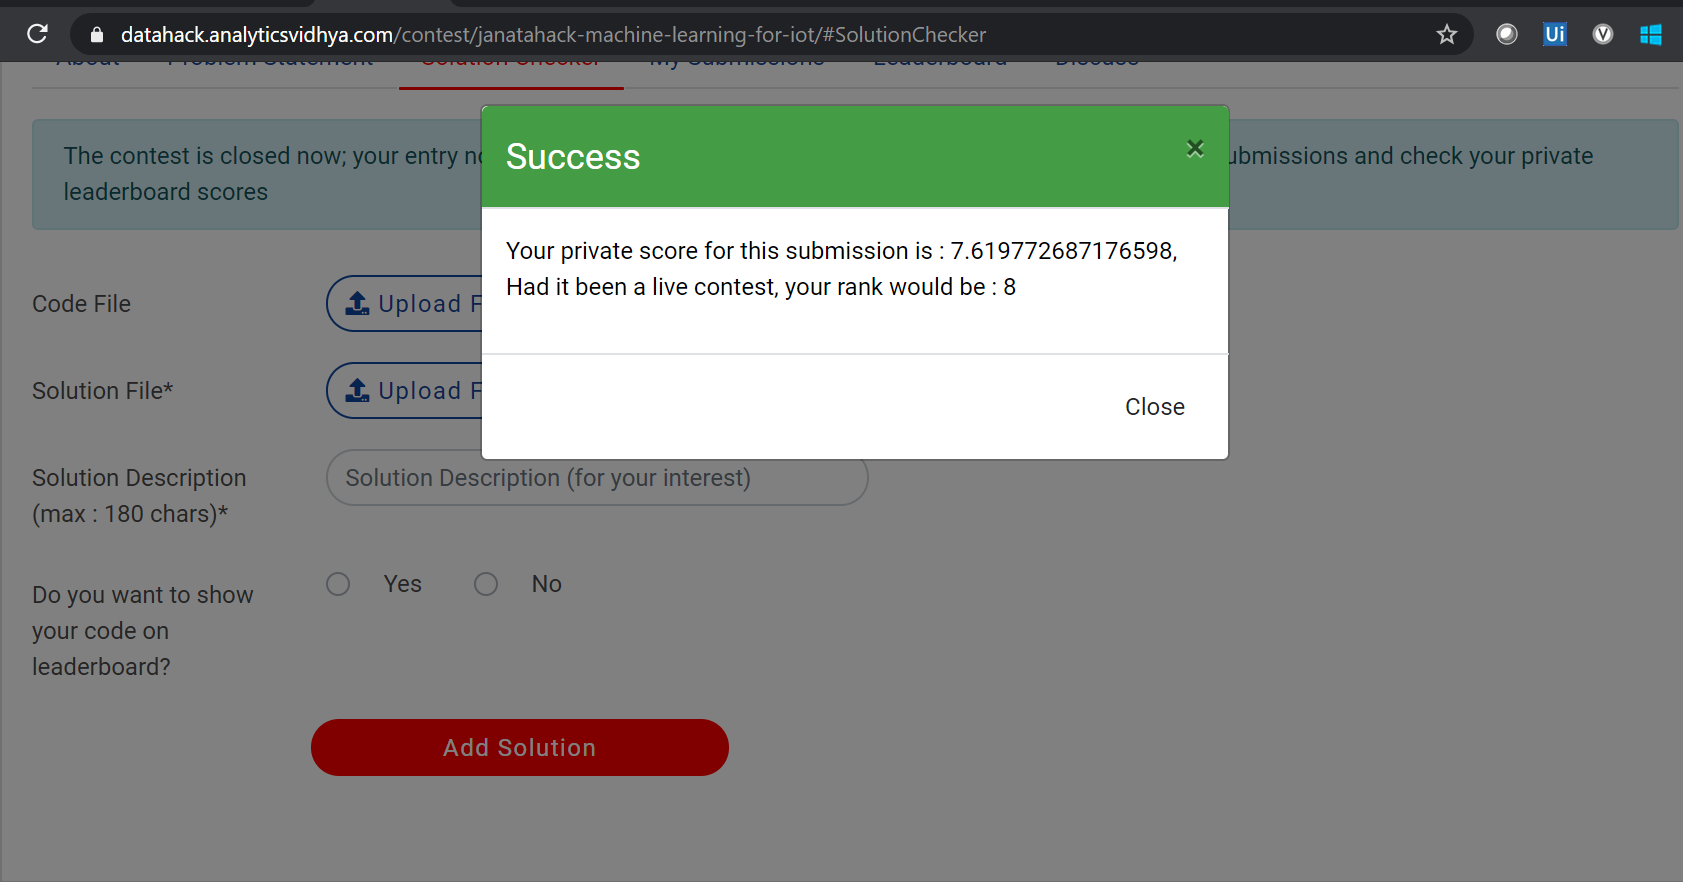

### **<center>😊 Reached Rank 8 - Thanks for reading Friends. See you all in Part 2 for more Analysis and Modelling - ENCOURAGE if you liked this Notebook 😊</center>**

### **<center>😊 For Learning Purpose - You can still participate in your free time to see your Public and Private Scores & Rank, though it won't reflect on Leaderboard 😊</center>**

### **<center>😊 Ask your doubts & Share your thoughts, ideas & feedbacks in Comments below 😊</center>**